In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
current_dir = os.getcwd()
df_path = os.path.join(current_dir, '..', 'data', 'teleCust1000t.csv' )
df = pd.read_csv(df_path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Region - Region code to the area where customers belong.

Tenure - Time in the company in months.

Age - Age of the customers.

Income - Their Salaries x1000

Marital - Their Martial Status, 0 = Single, 1 = Married

Address - Time living at the same address

Ed - Education Group

Employ - Employment Years

Retire - Retirement Status, 0 = Actived, 1 = Retired

Gender - Their Gender, 0 = Female, 1 = Male

Reside - Amount of people who lives in the residence

Custcat - Customer Category (Target Variable):
    ○ 1: Basic Service.
    ○ 2: E-Service.
    ○ 3: Plus Service.
    ○ 4: Total Service.

In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000 

In [8]:
# Check for missing values
print(df.isnull().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


Observamos que no tenemos ningún valor nulo en el dataset.

In [9]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}")
    print("-" * 40)

Column: region
Number of unique values: 3
Unique values: [2 3 1]
----------------------------------------
Column: tenure
Number of unique values: 72
Unique values: [13 11 68 33 23 41 45 38  5  7 57  9 29 60 34  1 26  6 53 55 14 42 25 56
 71 35 20 54 44 72 10 15 27 64 65 49 47 30 52 36 58 69 28 16  3 40 48  8
 67  2 31 62  4 17 43 12 61 59 51 19 22 70 50 46 39 24 21 18 63 37 66 32]
----------------------------------------
Column: age
Number of unique values: 60
Unique values: [44 33 52 30 39 22 35 59 41 38 54 46 57 48 24 29 43 21 40 37 53 50 27 60
 28 36 51 34 26 45 62 55 47 67 42 71 68 31 61 20 25 58 32 23 64 56 63 69
 65 66 19 76 70 49 75 72 74 77 18 73]
----------------------------------------
Column: marital
Number of unique values: 2
Unique values: [1 0]
----------------------------------------
Column: address
Number of unique values: 50
Unique values: [ 9  7 24 12 17  2  5 21 10 14  8 30  3 38 19 18  0 11  1  6 27 26 13 34
  4 20 28 36 16 15 22 44 29 23 31 25 49 41 39 43 33 32 35 

Al visualizar todos los valores, observamos que hay variables númericas y categóricas, por lo que vamos a dividirlas para explorarlas más adelante.  También descubrimos variables con valores float64 que no aportan un valor añadido, por lo que las pasamos a int64 posteriormente para poder trabajar mejor con ellas.
Tambien podemos deducir que "tenure" es un valor que nos está indicando los meses de lealtad a la compañía, ya que si esto estuviera indicado en años, sobrepasaría la edad de la muestra, por lo que sería imposible.


In [10]:
# Convert float64 columns to int64
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].astype('int64')

# Display new data types
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
region     int64
tenure     int64
age        int64
marital    int64
address    int64
income     int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object


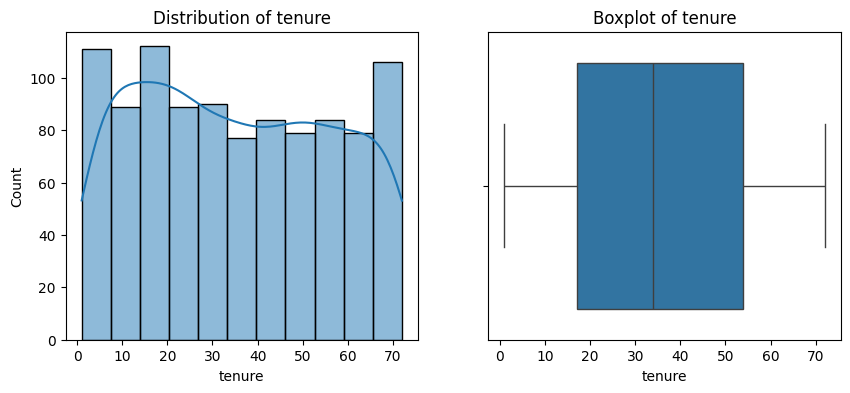

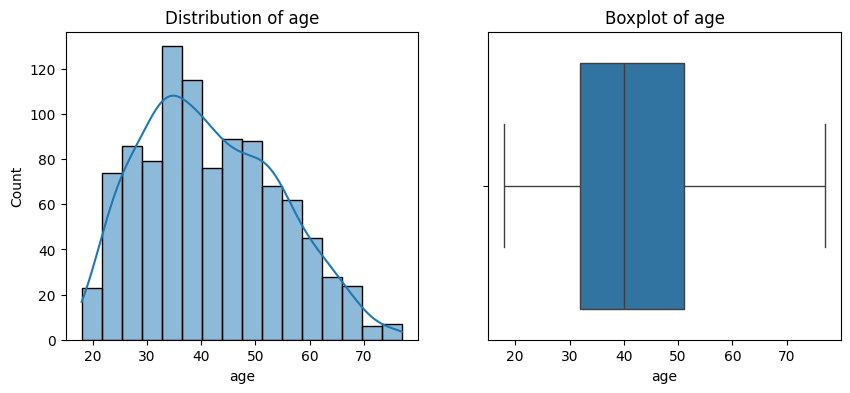

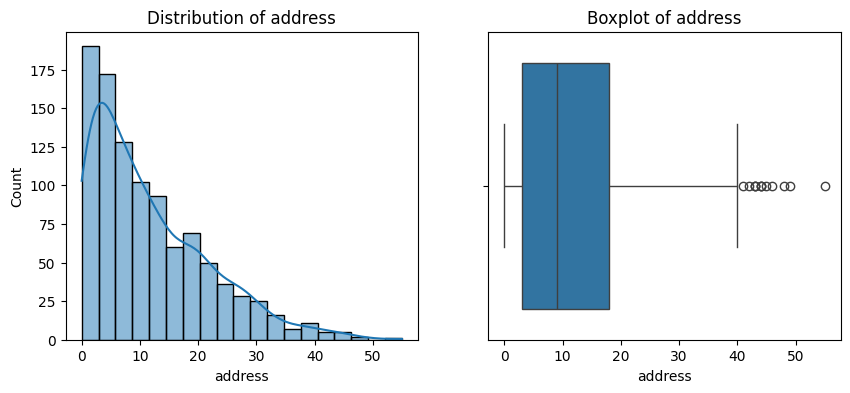

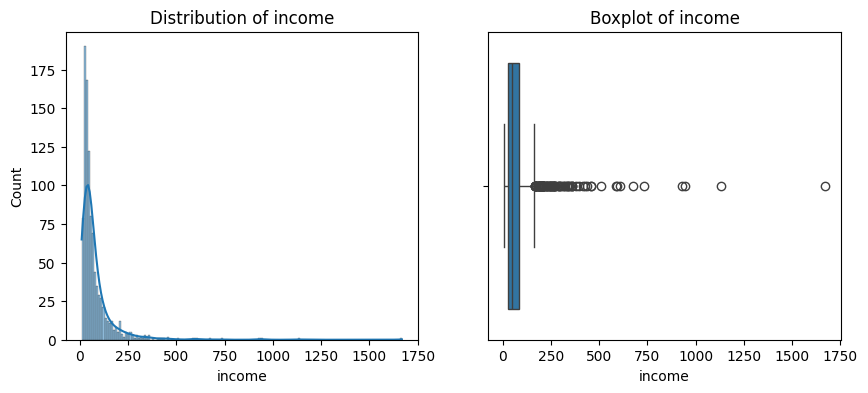

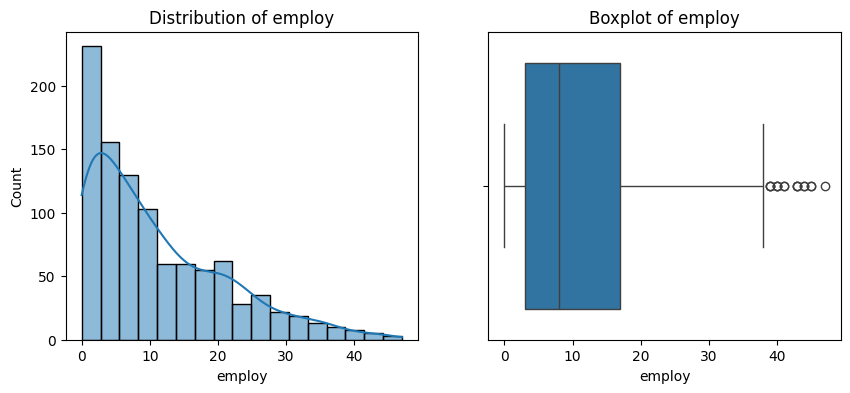

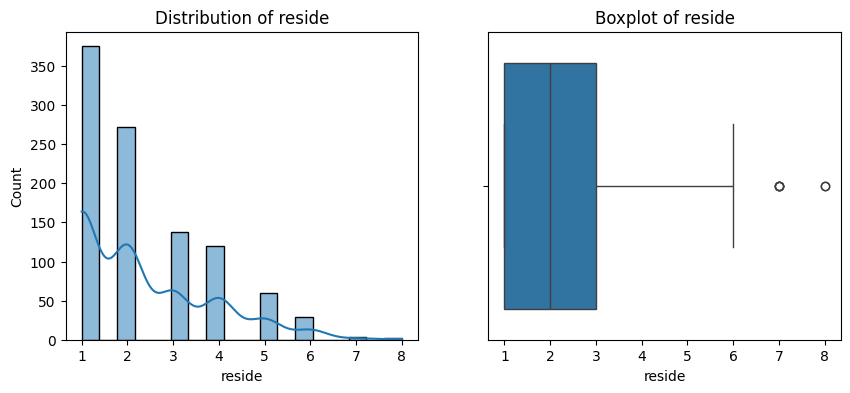

In [11]:
numerical_features = ['tenure', 'age', 'address', 'income', 'employ', 'reside']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

En el histograma de "tenure" observamos una distribución rlativamente uniforme en todo su rango. En el gráfico de boxplot la mediana esta cerca del centro, no tiene ninguna asimetría o valores atípicos. Esta variable podría contribuir directamente a predecir el custcat (categoría de cliente) debido a su distribución uniforme.

El histograma de "age" tiene una distribución aproximadamente normal, con la mayoría de valores agrupados entre 30-50 años, teniendo el mayor pico alrededor de los 30 años. La distribución es casi simétrica, lo que indica que cubre un rango de adultos, con enfoque en mediana edad. En el boxplot observamos que la mediana está en torno a los 40 años, y la caja (50%) de los datos cubre aproximadamente los 30-50. La ausencia de valores atípicos y su distribución, sugiere que puede ser una variable importante para nuestro modelo.

En el histograma de "address" la distribución esta fuertemente sesgada a la derecha, lo que quiere decir que la mayoría de los valores se concentran en el rango inferior cerca de 0. Así mismo observamos que la mediana esta cerca de esos valores inferiores entre 0 y 10, también observamos una gran cantidad de valores atipicos que podemos analizar más adelante. Esta asimetría y tendencia hacia los valores bajos, puede reflejar algo significativo del cliente, como por ejemplo la importancia de retener a esos nuevos clientes, ya que son una gran cantidad de la muestra y darles el soporte necesario.

En "employ" la gráfica muestra una distribución muy parecida a "address", lo que sugiere que la mayoría de los clientes en el conjunto de datos están relativamente al inicio de sus carreras o tienen experiencia laboral limitada. El valor mediano se encuentra entre los 5-10 años, y la caja.

Lo mismo vemos con 'reside', la mayoría de muestras de nuestro dataset se encuentra en los valores de 1-3 hijos, siendo mucho más relevante entre 1 y 2 hijos. Por lo que la muestra esta sesgada a la derecha.

Analizando los diferentes valores atípicos, decido no tratarlos antes del escalado y la transformación, ya que representan valores reales, que aportan información valiosa sobre otro tipo de muestras.

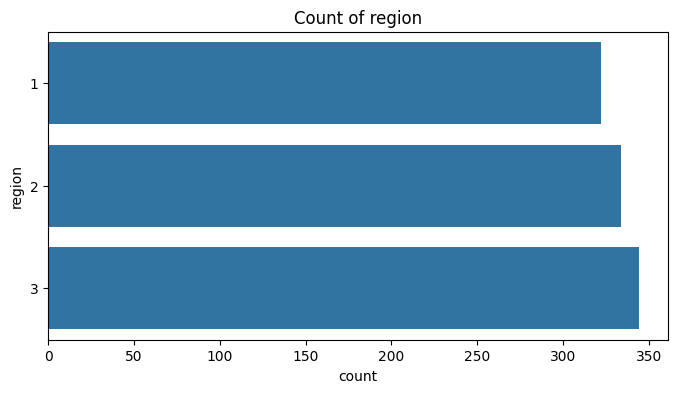

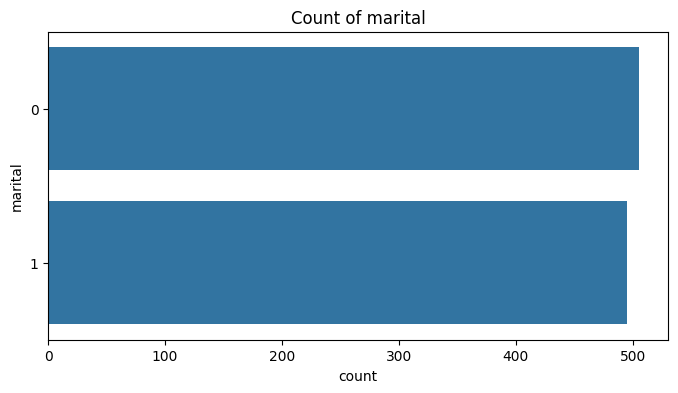

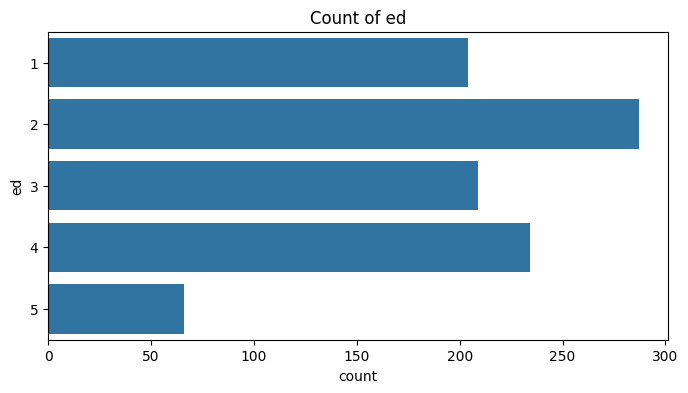

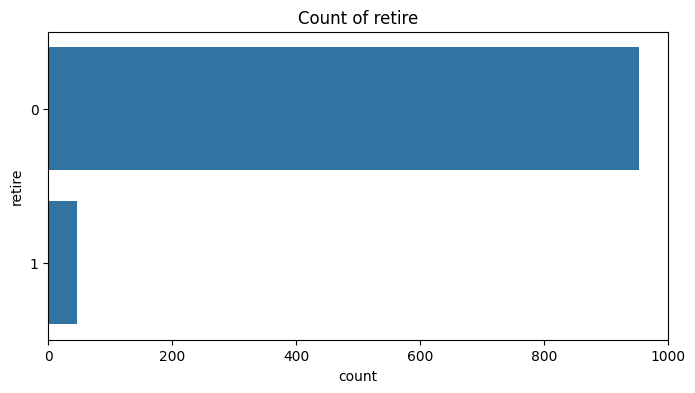

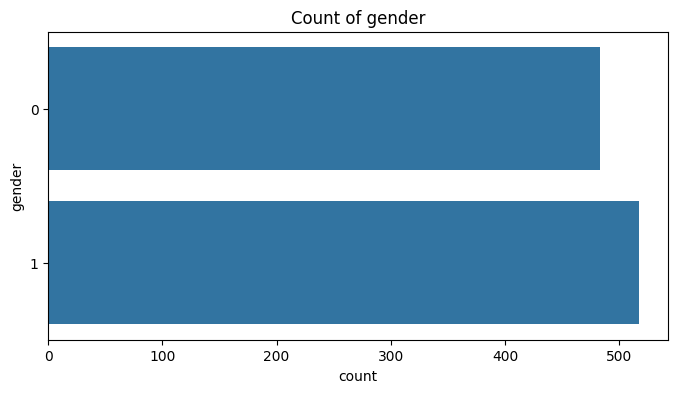

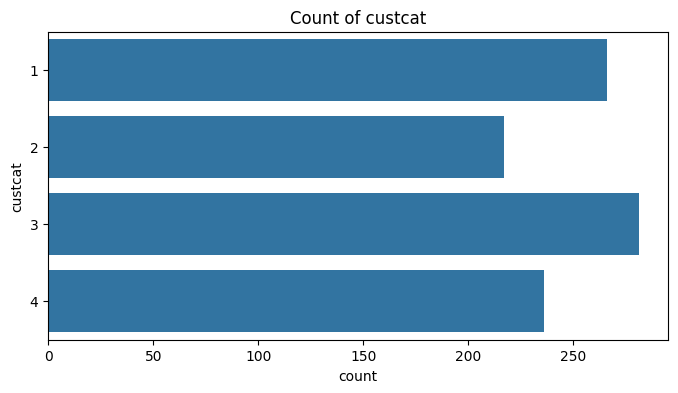

In [12]:
categorical_features = ['region', 'marital', 'ed', 'retire', 'gender', 'custcat']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[feature])
    plt.title(f'Count of {feature}')
    plt.show()

En cuanto a la distribución de las variables categóricas, tenemos dos que estan desbalanceadas, "retire" y "ed". En el caso de "retire", el desbalanceo es muy grande, no tenemos casi muestras de gente retired, por lo que deberíamos analizar más adelante, si este desbalanceo afectará al rendimiento del modelo. En el caso de "ed", del valor 5 tenemos muy pocas muestras respecto a los demás valores.

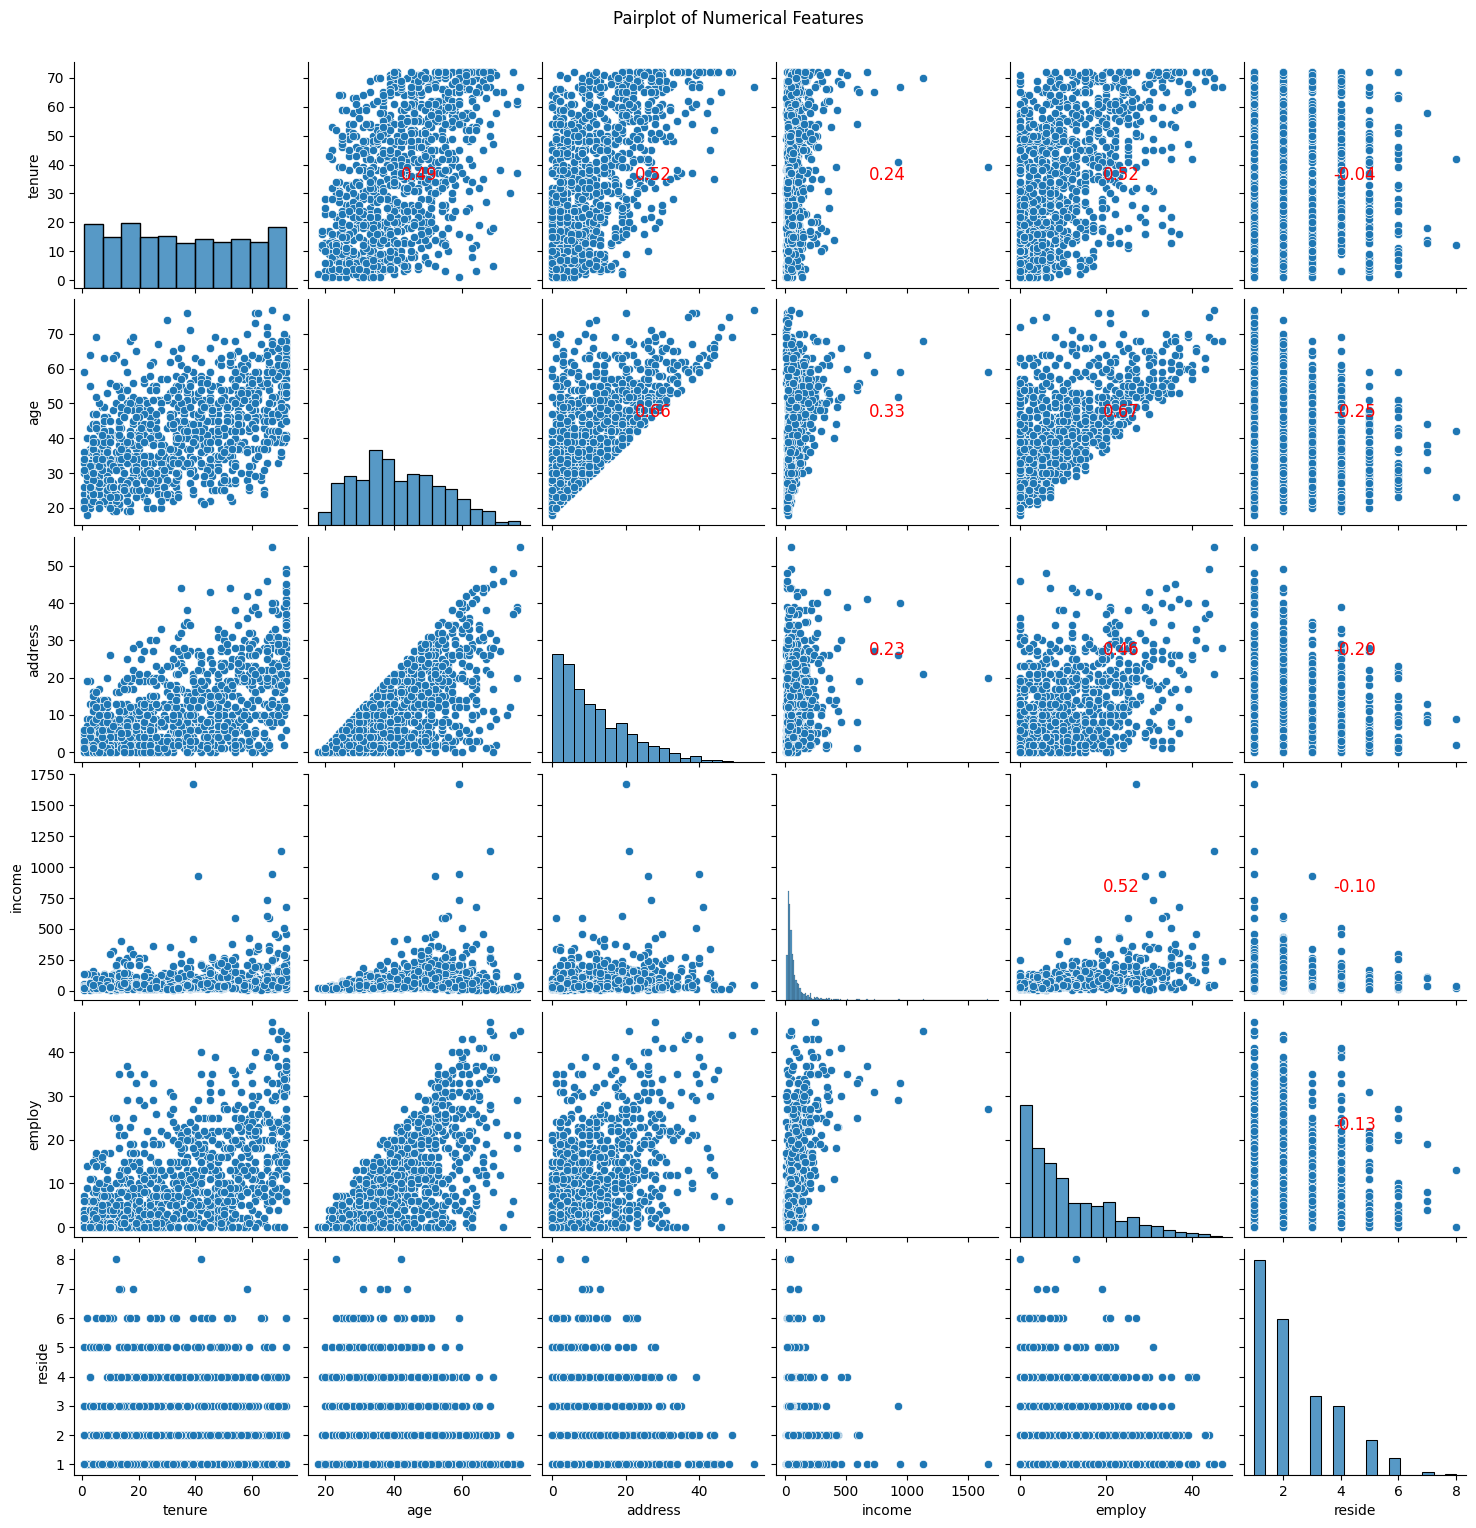

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to annotate correlation coefficients on the pairplot
def annotate_corr(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{corr:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, color='red')

# Assuming 'df' is your DataFrame and 'numerical_features' is the list of numerical columns
pairplot = sns.pairplot(df[numerical_features])

# Apply the annotation function to each subplot in the upper triangle
pairplot.map_upper(annotate_corr)

plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Estos gráficos muestran los histogramas que hemos analizado anteriormente, pero también las relaciones entre pares de variables.
Podemos observar las correlaciones más fuertes entre age e employ, y age y address con un 0,66 - 0,67. Otras correlaciones tambien destacables son tenure con age, address y employ, asi como income y employ. Vamos a desglosar estas relaciones más a fondo.

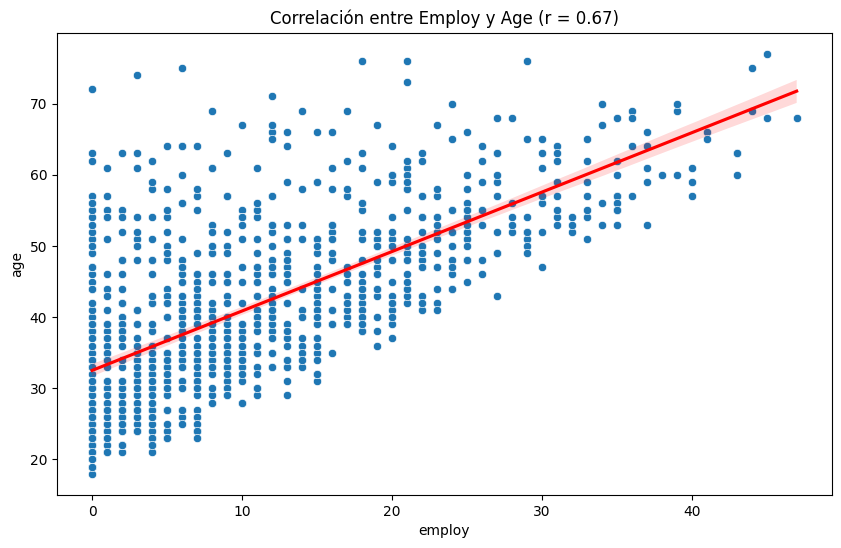

El coeficiente de correlación entre 'employ' y 'age' es: 0.6700


In [14]:
# Calcular la correlación
correlation = df['employ'].corr(df['age'])

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='employ', y='age', data=df)
plt.title(f'Correlación entre Employ y Age (r = {correlation:.2f})')
plt.xlabel('Employ')
plt.ylabel('Age')

# Añadir una línea de regresión
sns.regplot(x='employ', y='age', data=df, scatter=False, color='red')

plt.show()

print(f"El coeficiente de correlación entre 'employ' y 'age' es: {correlation:.4f}")

Al observar una correlación con estos valores, podemos deducir que la variable "employ" no nos está indicando distintos tipos de empleos, sino los años que lleva empleada cada persona. 

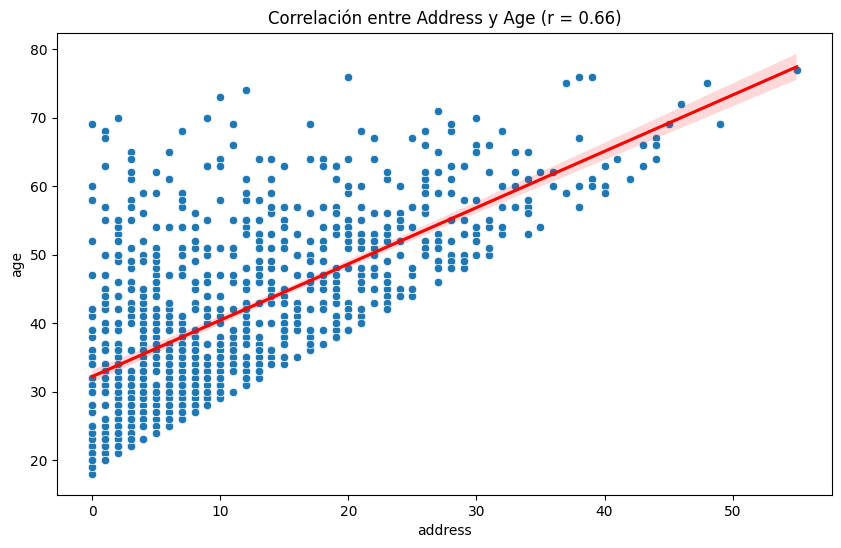

El coeficiente de correlación entre 'address' y 'age' es: 0.6604


In [15]:
# Calcular la correlación
correlation = df['address'].corr(df['age'])

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='address', y='age', data=df)
plt.title(f'Correlación entre Address y Age (r = {correlation:.2f})')
plt.xlabel('Address')
plt.ylabel('Age')

# Añadir una línea de regresión
sns.regplot(x='address', y='age', data=df, scatter=False, color='red')

plt.show()

print(f"El coeficiente de correlación entre 'address' y 'age' es: {correlation:.4f}")

Igual que con la variable employ, analizando la relacion entre age y address, al tener una correlación bastante relevante, podemos deducir que los valores de address no se tratan de codigos postales o calles, sino el tiempo que una persona lleva viviendo en esa misma dirección. 

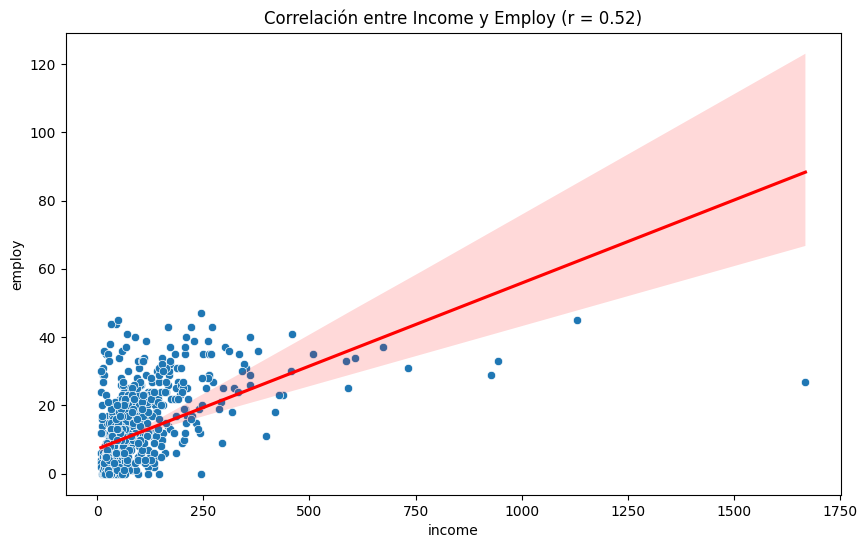

El coeficiente de correlación entre 'income' y 'employ' es: 0.5163


In [16]:
# Calcular la correlación
correlation = df['income'].corr(df['employ'])

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='employ', data=df)
plt.title(f'Correlación entre Income y Employ (r = {correlation:.2f})')
plt.xlabel('Income')
plt.ylabel('Employ')

# Añadir una línea de regresión
sns.regplot(x='income', y='employ', data=df, scatter=False, color='red')

plt.show()

print(f"El coeficiente de correlación entre 'income' y 'employ' es: {correlation:.4f}")

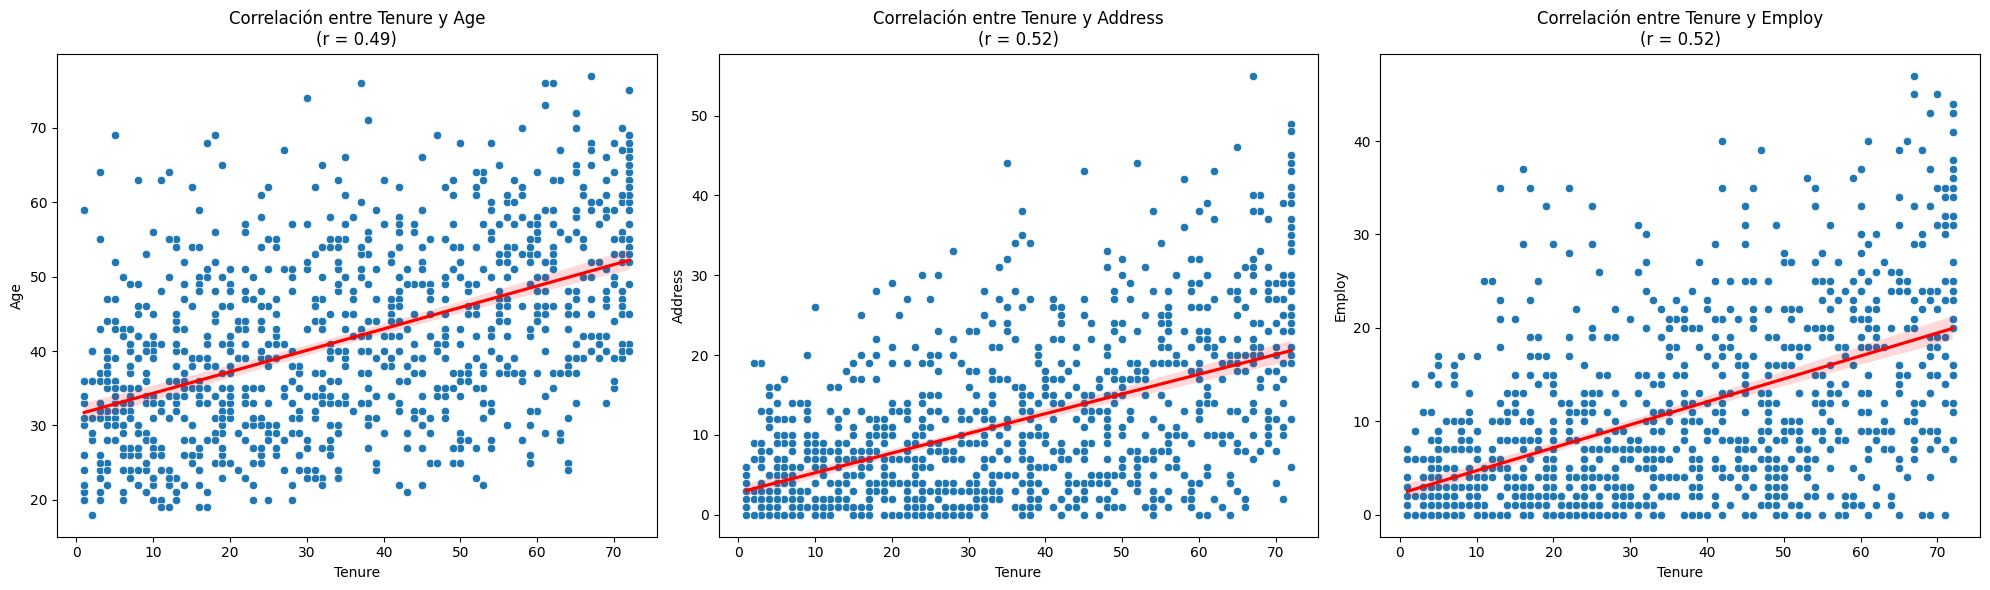

El coeficiente de correlación entre 'tenure' y 'age' es: 0.4902
El coeficiente de correlación entre 'tenure' y 'address' es: 0.5230
El coeficiente de correlación entre 'tenure' y 'employ' es: 0.5203


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con tres subplots en una línea
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Lista de variables para comparar con tenure
variables = ['age', 'address', 'employ']

# Crear los gráficos de dispersión
for ax, var in zip([ax1, ax2, ax3], variables):
    # Calcular la correlación
    correlation = df['tenure'].corr(df[var])
    
    # Crear el gráfico de dispersión
    sns.scatterplot(x='tenure', y=var, data=df, ax=ax)
    
    # Añadir la línea de regresión
    sns.regplot(x='tenure', y=var, data=df, scatter=False, color='red', ax=ax)
    
    # Configurar el título y las etiquetas
    ax.set_title(f'Correlación entre Tenure y {var.capitalize()}\n(r = {correlation:.2f})')
    ax.set_xlabel('Tenure')
    ax.set_ylabel(var.capitalize())

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Imprimir los coeficientes de correlación
for var in variables:
    correlation = df['tenure'].corr(df[var])
    print(f"El coeficiente de correlación entre 'tenure' y '{var}' es: {correlation:.4f}")

Estos gráficos nos indican 3 factores que pueden influir positivamente en el aumento de tenure, es decir, fidelidad de los clientes, ya que están relacionados.

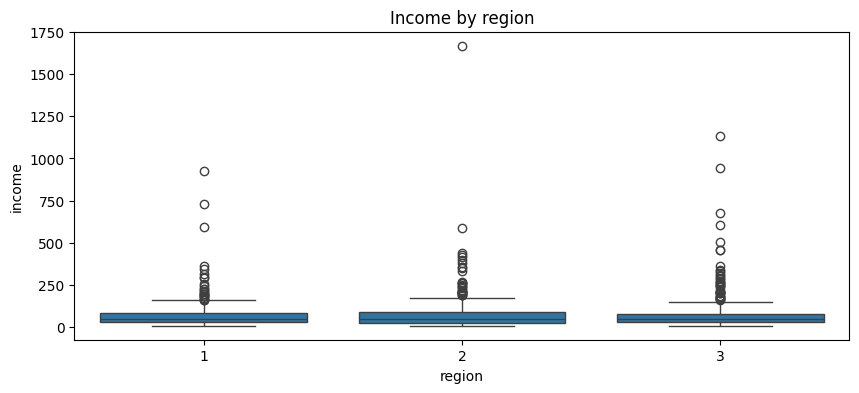

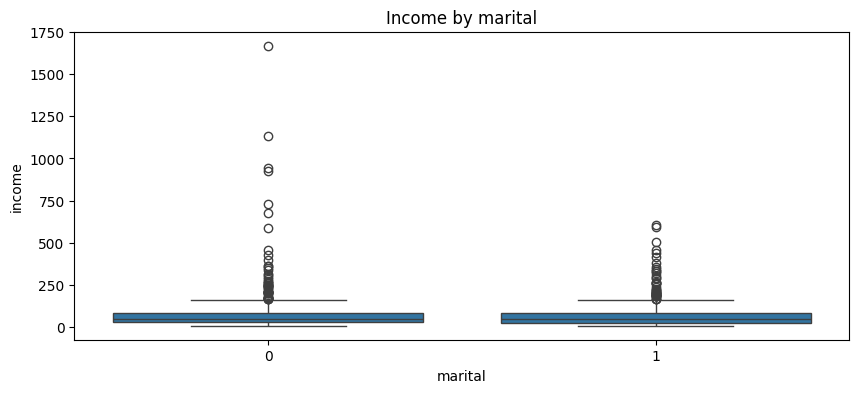

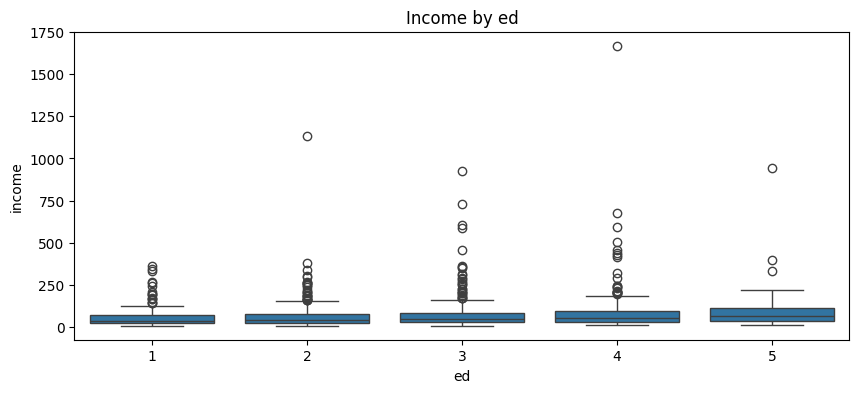

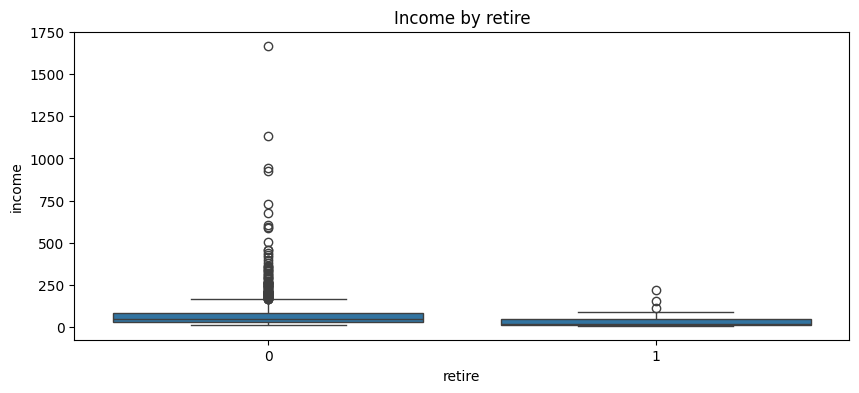

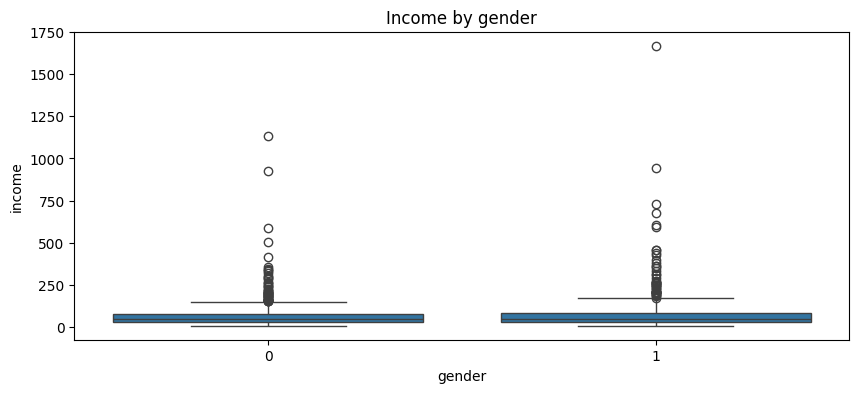

In [18]:
for feature in categorical_features:
    if feature != 'custcat':
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[feature], y=df['income'])
        plt.title(f'Income by {feature}')
        plt.show()

Analizando las relaciones de "income", sólo tiene relevancia la relación con "ed" y con "retire". Siendo menor el "income" para la gente que esta retirada, aunque no supone una gran diferencia. Vamos a analizar más en detalle la relación entre "income" y "ed":

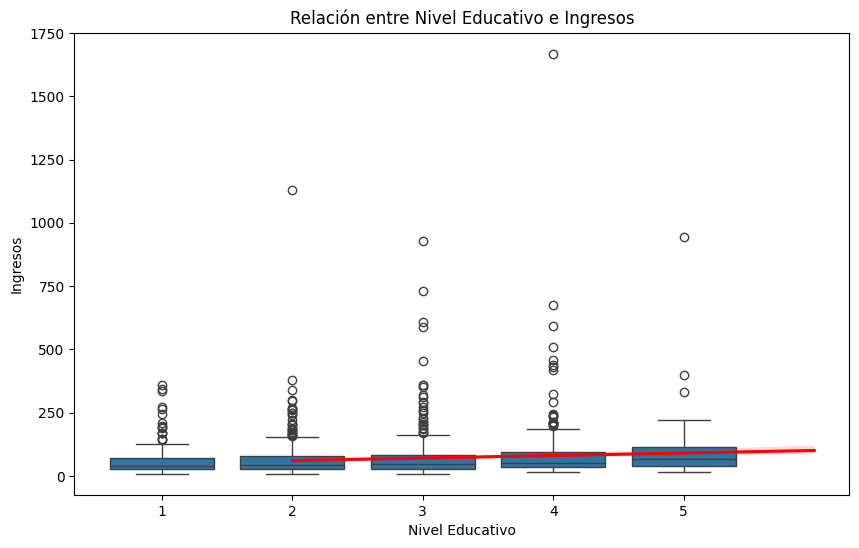

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ed', y='income', data=df)
sns.regplot(x='ed', y='income', data=df, scatter=False, color='red')
plt.title('Relación entre Nivel Educativo e Ingresos')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos')
plt.show()

Se puede observar una cierta tendencia a aumentar el nivel de ingresos, al aumentar el nivel de estudios.

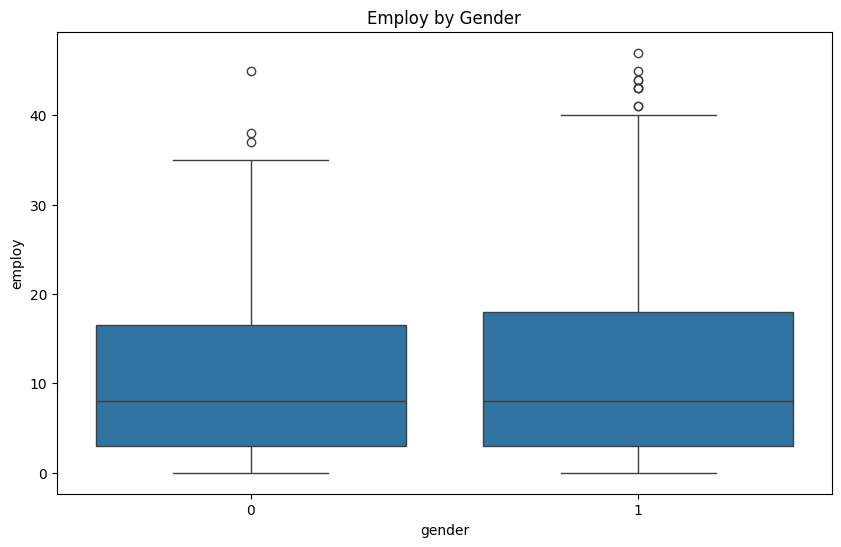

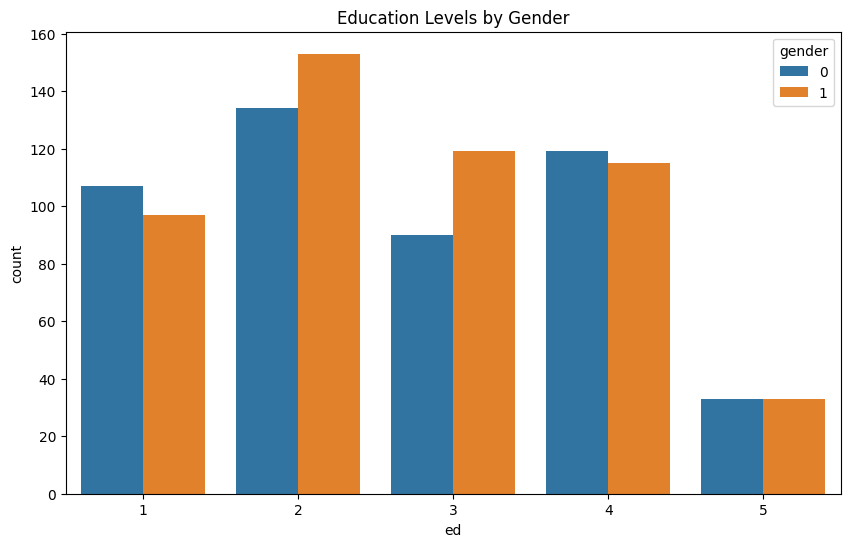

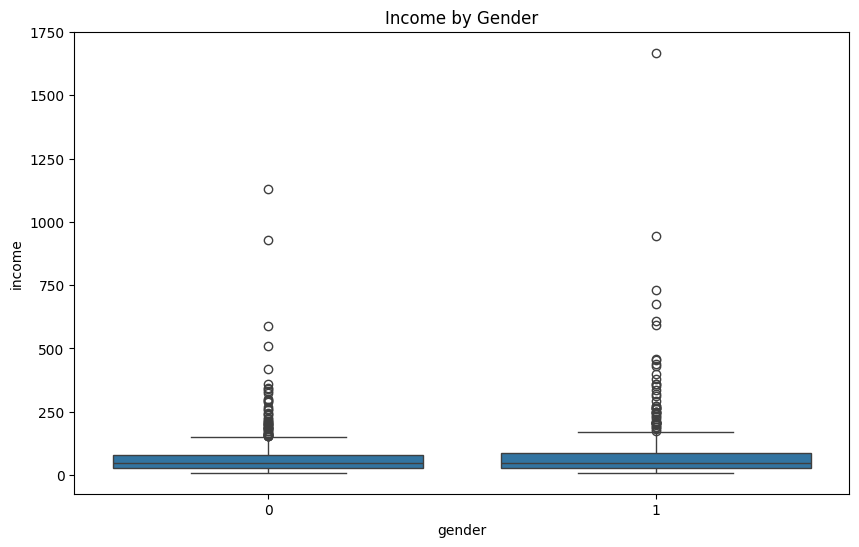

In [20]:
# Gender vs. Employ
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='employ', data=df)
plt.title('Employ by Gender')
plt.show()

# Gender vs. Ed
plt.figure(figsize=(10, 6))
sns.countplot(x='ed', hue='gender', data=df)
plt.title('Education Levels by Gender')
plt.show()

# Gender vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df)
plt.title('Income by Gender')
plt.show()

Para intentar deducir a que valor corresponde cada valor de "gender", tras comparar con "employ", "ed" e "income", no se ven unos daros muy relevantes. Vamos a probar con unos valores de edad mayores, teniendo en cuenta que años atrás, las mujeres dejaban su empleo al tener hijos, para dedicarse a la familia y el hogar, de manera que si disminuye la igualdad entre "employ", "ed" e "income", podría ser relevante e indicarnos el tipo de género correspondiente a cada valor.

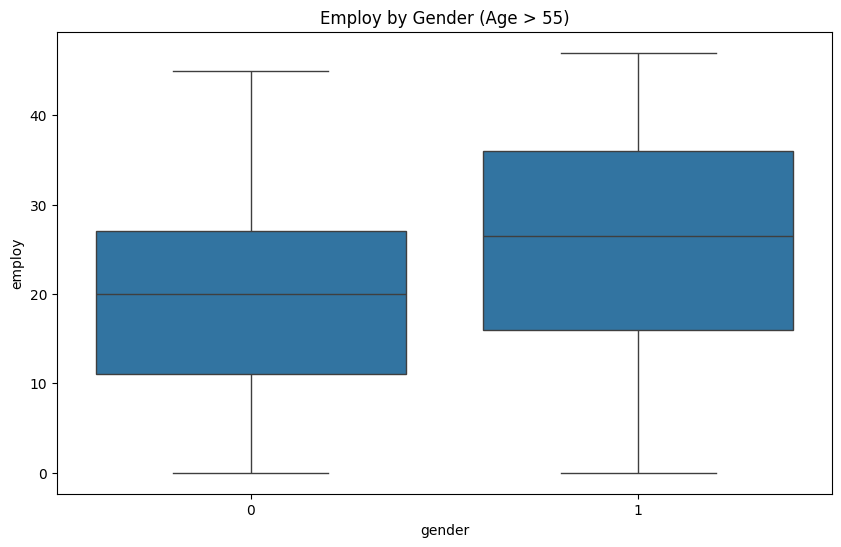

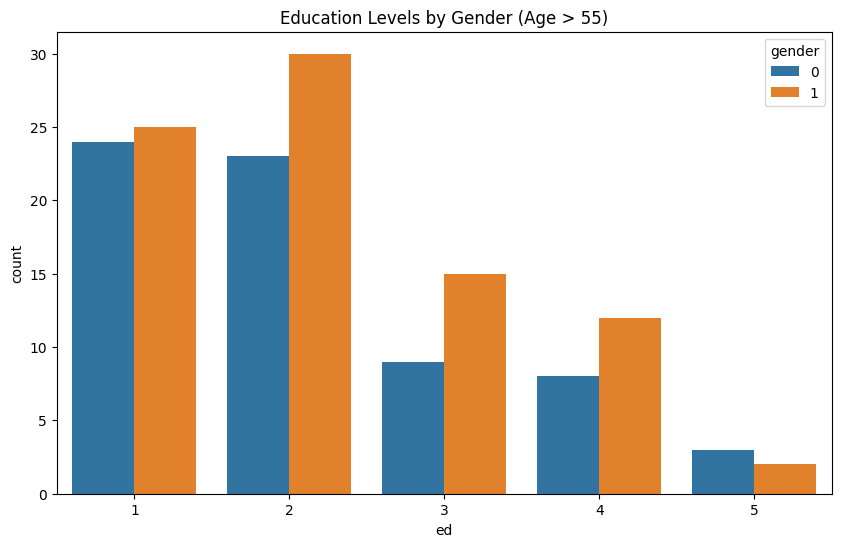

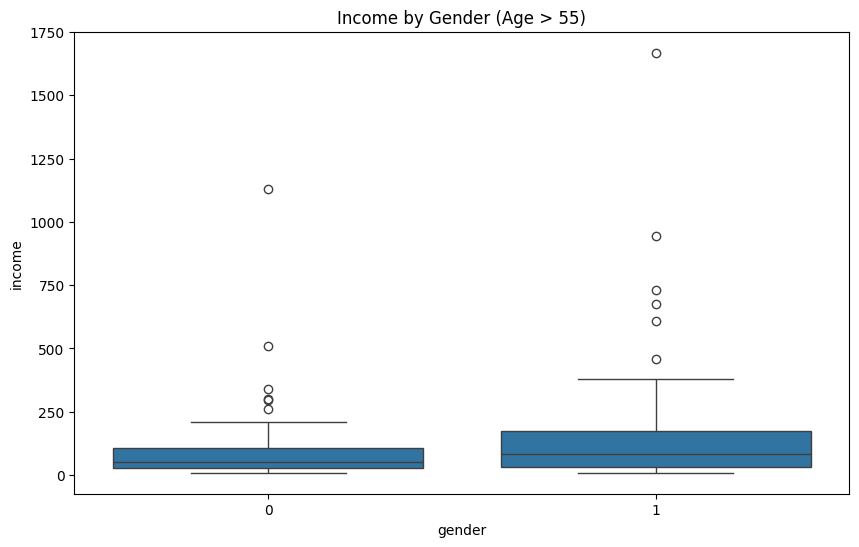

In [21]:
# Filter the dataframe for ages > 55
df_filtered = df[df['age'] > 55]

# Gender vs. Employ
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='employ', data=df_filtered)
plt.title('Employ by Gender (Age > 55)')
plt.show()

# Gender vs. Ed
plt.figure(figsize=(10, 6))
sns.countplot(x='ed', hue='gender', data=df_filtered)
plt.title('Education Levels by Gender (Age > 55)')
plt.show()

# Gender vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df_filtered)
plt.title('Income by Gender (Age > 55)')
plt.show()

Tras analizar los datos en edades superiores a 55 años, vemos que se cumple que en el genero 0, los tres valores son inferiores, y hay mucha desigualdad en comparación con las gráficas anteriores que mostraban una visión total de las edades. Por lo que podemos deducir que el valor 0, se corresponde con el género Femenino y el valor 1 con el género masculino.

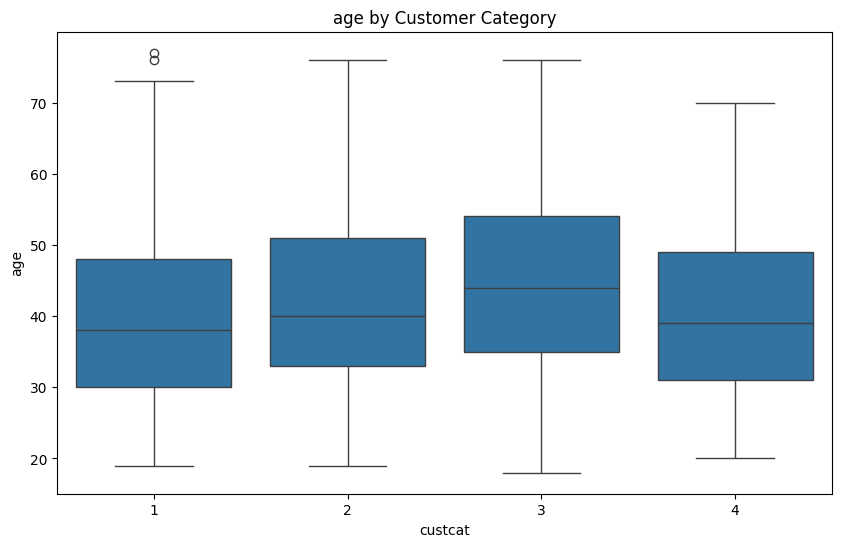

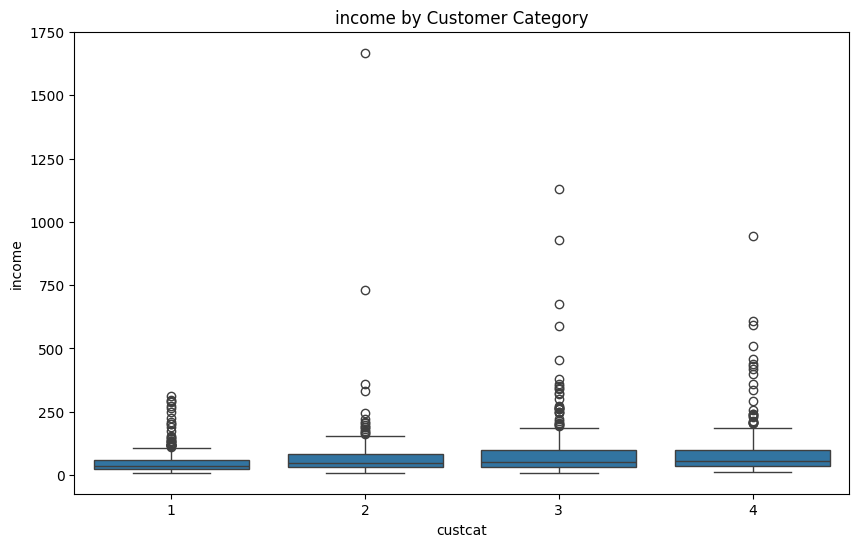

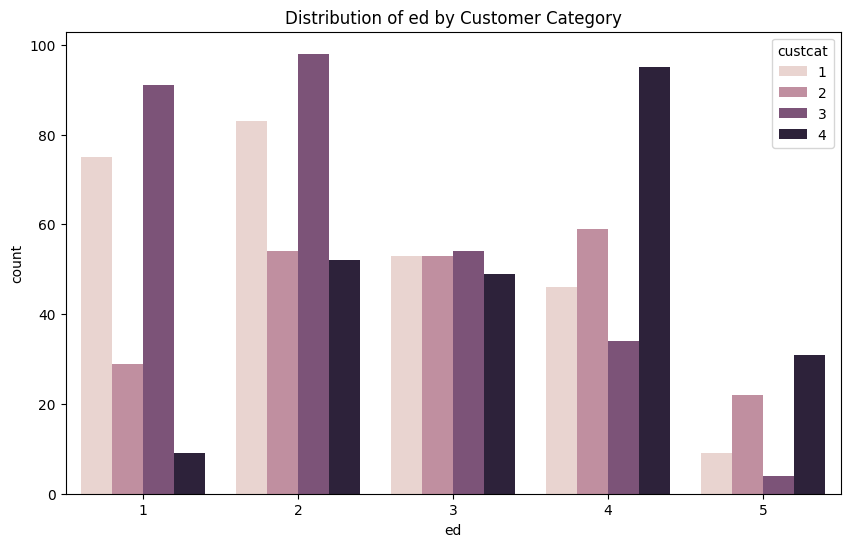

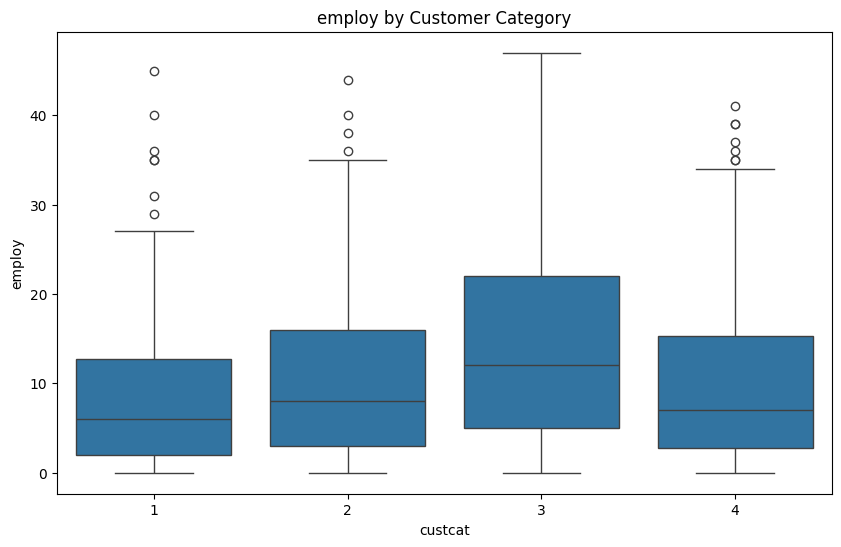

In [24]:
# List of variables to compare with custcat
variables = ['age', 'income', 'ed', 'employ']

for var in variables:
    plt.figure(figsize=(10, 6))
    if df[var].dtype == 'object' or df[var].nunique() < 10:
        sns.countplot(x=var, hue='custcat', data=df)
        plt.title(f'Distribution of {var} by Customer Category')
    else:
        sns.boxplot(x='custcat', y=var, data=df)
        plt.title(f'{var} by Customer Category')
    plt.show()

Tras analizar la relación de nuestra variable objetivo con otras variables, no tiene unas relaciones muy relevantes, peo si que en el caso de income o employ, se puede observar que cuando aumentan, aumenta el nivel del servicio contratado, excepto en el caso del nivel 4 de Cutcast, que no guarda esa relación.

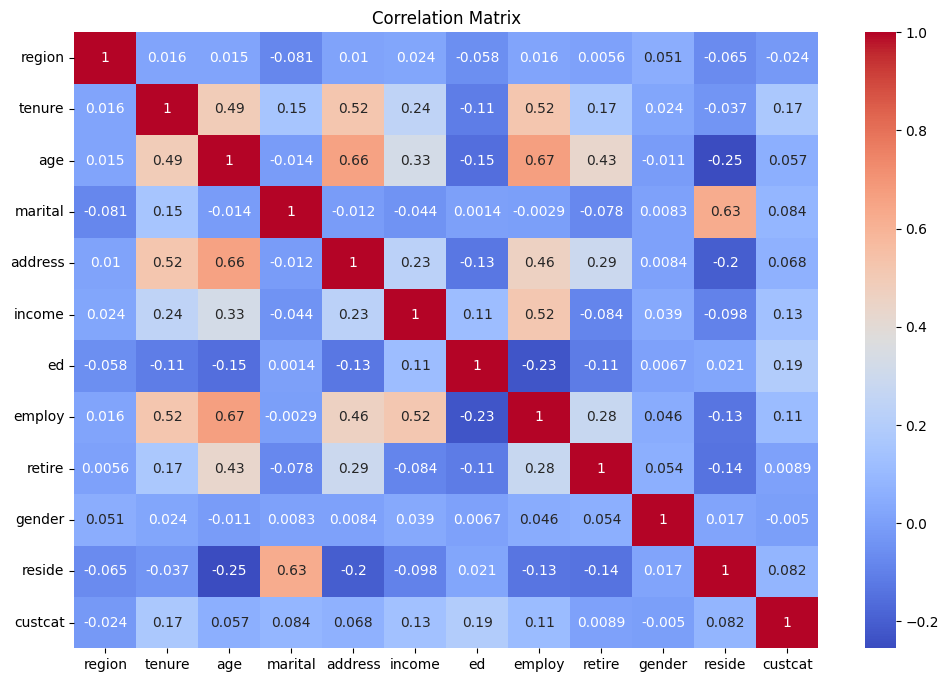

In [26]:
# Correlation analysis
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Con este heatmap observamos la fuerte correlación entre las variables que habiamos analizado anteriormente, "tenure", "age", "address", "income". Y tambien una correlación bastante relevante entre "marital" y "reside", ya que si  marital es True, el valor de reside será mayor.